In [ ]:
'''
This script uses the SamenvoegenCSV_metermonitoring dataset (xlsx format)
It evaluates the relation between power from charging poles and total power
NOTE: the data needs to be checked as it might be wrong
'''

In [1]:
import numpy as np
import datetime as dt
import sklearn
import pandas as pd
from sklearn import preprocessing 

In [2]:
# read data


df = pd.read_excel (r'Data/SamenvoegenCSV_metermonitoring.xlsx')
X=df.copy()

In [4]:
# select power format of data


df_power = X[X['Extra info'] =="Actief vermogen totaal"]


In [6]:
# sum powers of circuits of same timestamp
# skip the first timestamp as it is a sample reading

indices=df_power.index.values
list_of_dates=[]
list_of_total_power=[]
list_of_charging_power=[]

counter=0
total_power=0
for i in range(4,len(indices)):
    counter=counter+1
    curr_power=df_power.loc[indices[i]]["Meetwaarde"]
    total_power=total_power+curr_power
    if counter==4:
        counter=0
        list_of_charging_power.append(curr_power)
        list_of_total_power.append(total_power)
        total_power=0
        list_of_dates.append(df_power.loc[indices[i]]["Tijdstip"])

In [7]:
# group data per hour (sum and count)


from datetime import datetime

power_date_dict = {}
power_date_dict_charging = {}


power_date_dict_we = {}

power_date_dict_charging_we = {}



for i in range(len(list_of_dates)):
    date_time=list_of_dates[i]
    curr_date=date_time.date()
    curr_hour=date_time.hour
    weekno = date_time.weekday()
    dict_to_use=power_date_dict
    dict_to_use_charging=power_date_dict_charging
    
    if weekno > 4:
        dict_to_use=power_date_dict_we
        dict_to_use_charging=power_date_dict_charging_we
    curr_key=(curr_date,curr_hour)
    if curr_key in dict_to_use:
        dict_to_use[curr_key][0]=dict_to_use[curr_key][0]+list_of_total_power[i]
        dict_to_use[curr_key][1]=dict_to_use[curr_key][1]+1
        
        dict_to_use_charging[curr_key][0]=dict_to_use_charging[curr_key][0]+list_of_charging_power[i]
        dict_to_use_charging[curr_key][1]=dict_to_use_charging[curr_key][1]+1
    else:
        dict_to_use[curr_key]=[list_of_total_power[i],1]
        dict_to_use_charging[curr_key]=[list_of_charging_power[i],1]

In [8]:
# reformat to get average (sum/count)


list_of_dates=[]
list_of_powers=[]

list_of_powers_charging=[]

for key in power_date_dict:
    list_of_dates.append(key)
list_of_dates=sorted(list_of_dates)
for key in list_of_dates:
    value=power_date_dict[key]
    value_charging=power_date_dict_charging[key]
    list_of_powers.append(value[0]/(1000*value[1]))
    list_of_powers_charging.append(value_charging[0]/(1000*value_charging[1]))
    
    
    power_date_dict[key][0]=value[0]/(1000*value[1])
    power_date_dict[key][1]=1
    
    power_date_dict_charging[key][0]=value_charging[0]/(1000*value_charging[1])
    power_date_dict_charging[key][1]=1
    
list_of_dates_we=[]
list_of_powers_we=[]
for key in power_date_dict_we:
    list_of_dates_we.append(key)
list_of_dates_we=sorted(list_of_dates_we)
for key in list_of_dates_we:
    value=power_date_dict_we[key]
    list_of_powers_we.append(value[0]/(1000*value[1]))

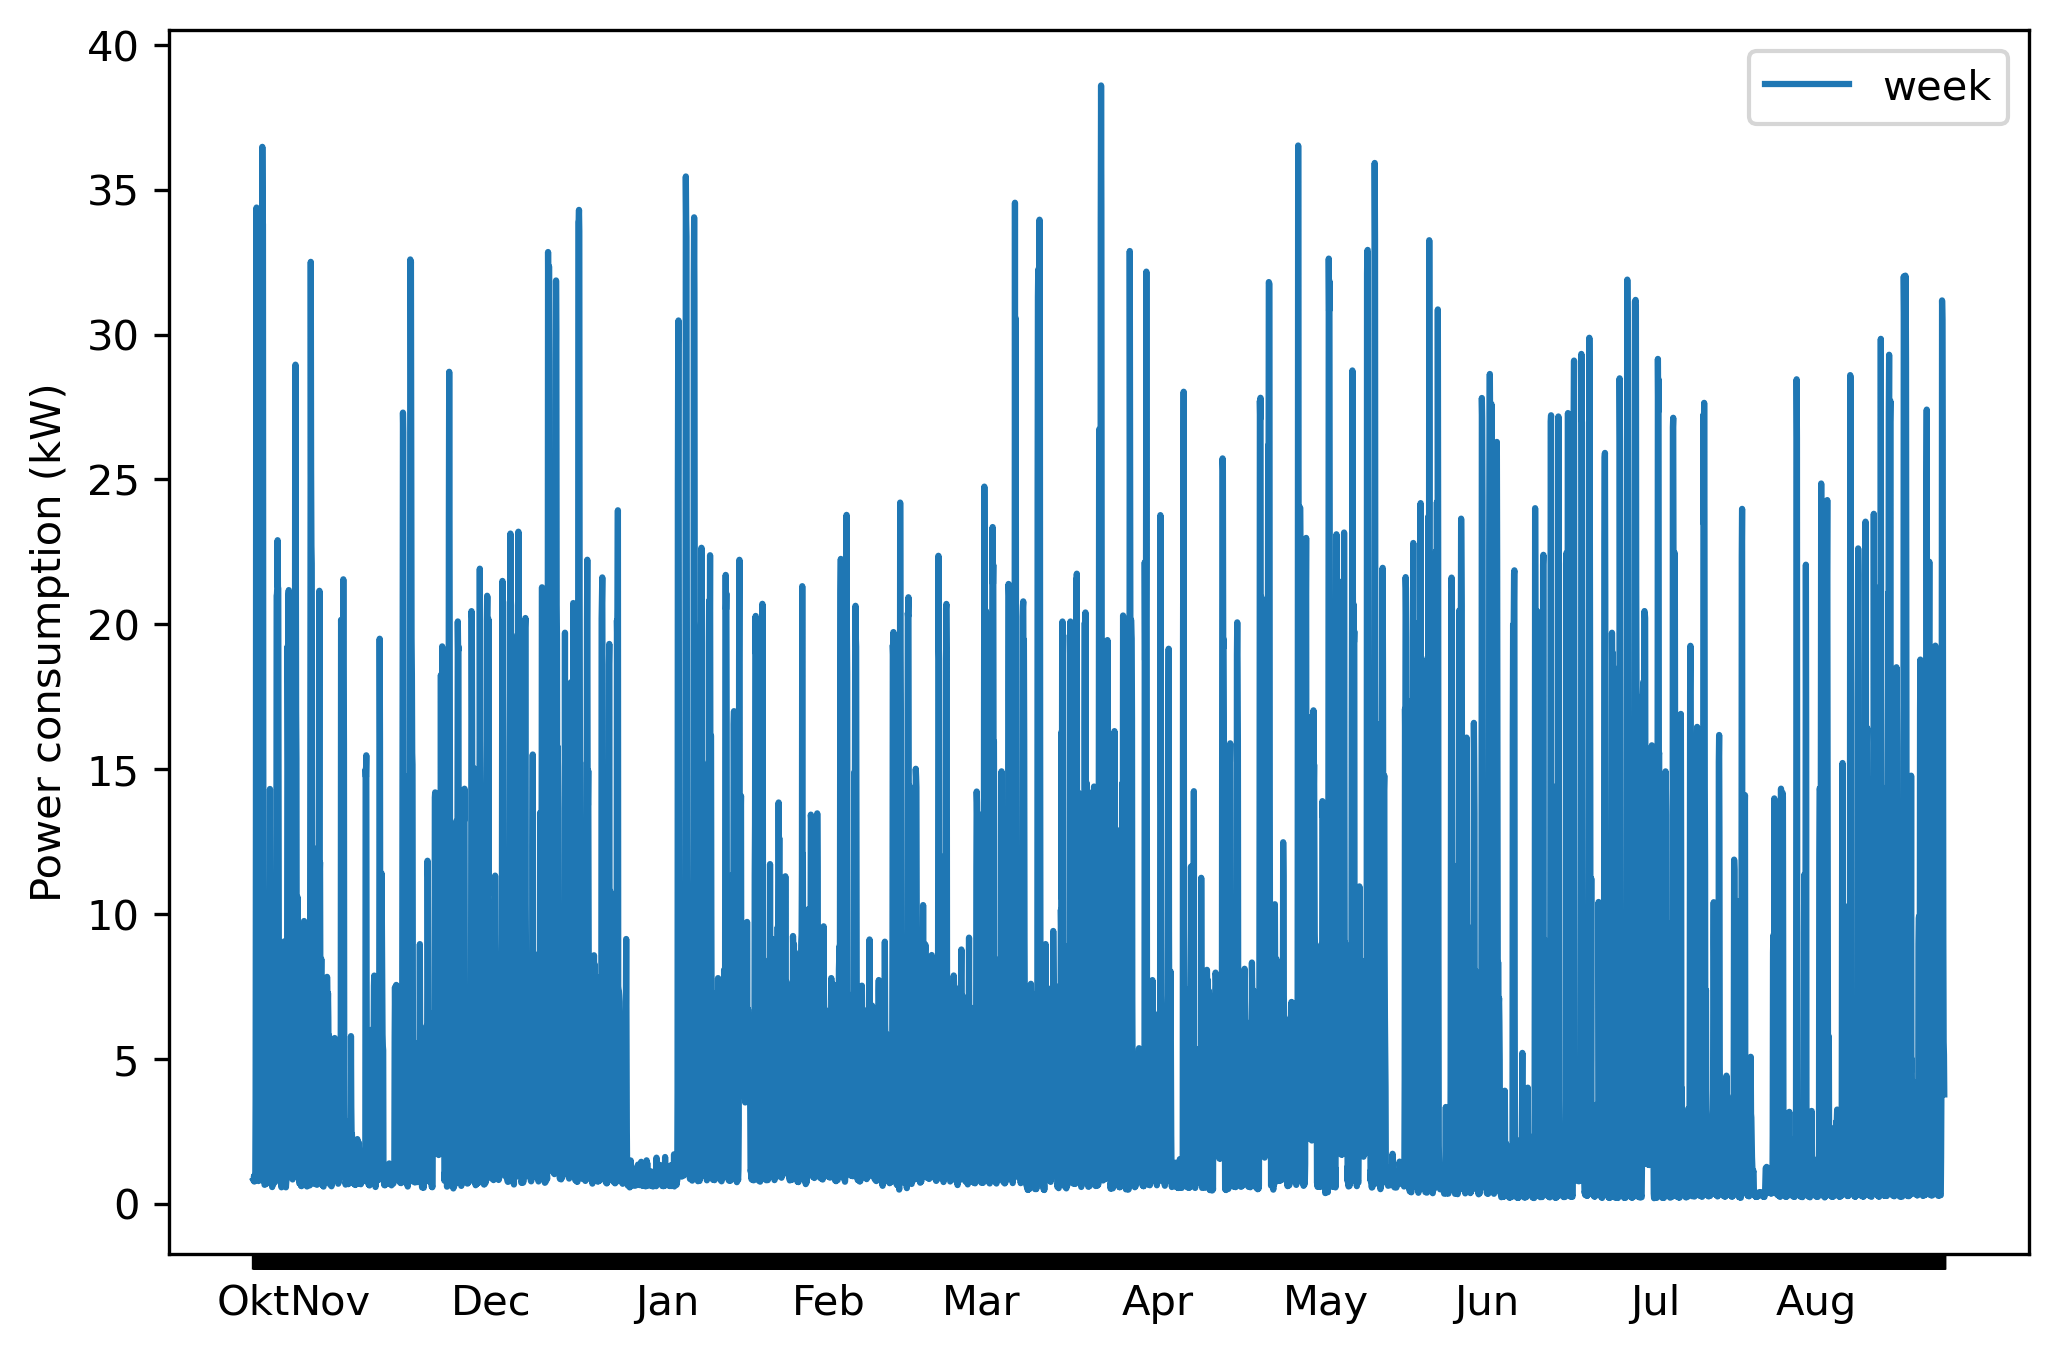

In [9]:
# plot average total power consumption per hour during the week


import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date_hour in list_of_dates:
    date=date_hour[0]
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates)), list_of_powers,label = "week")
plt.xticks((range(len(list_of_dates))), x_labels)
plt.ylabel('Power consumption (kW)')
plt.legend()
plt.savefig(os.path.join('average power consumption per hour week.png'), dpi=300, format='png')

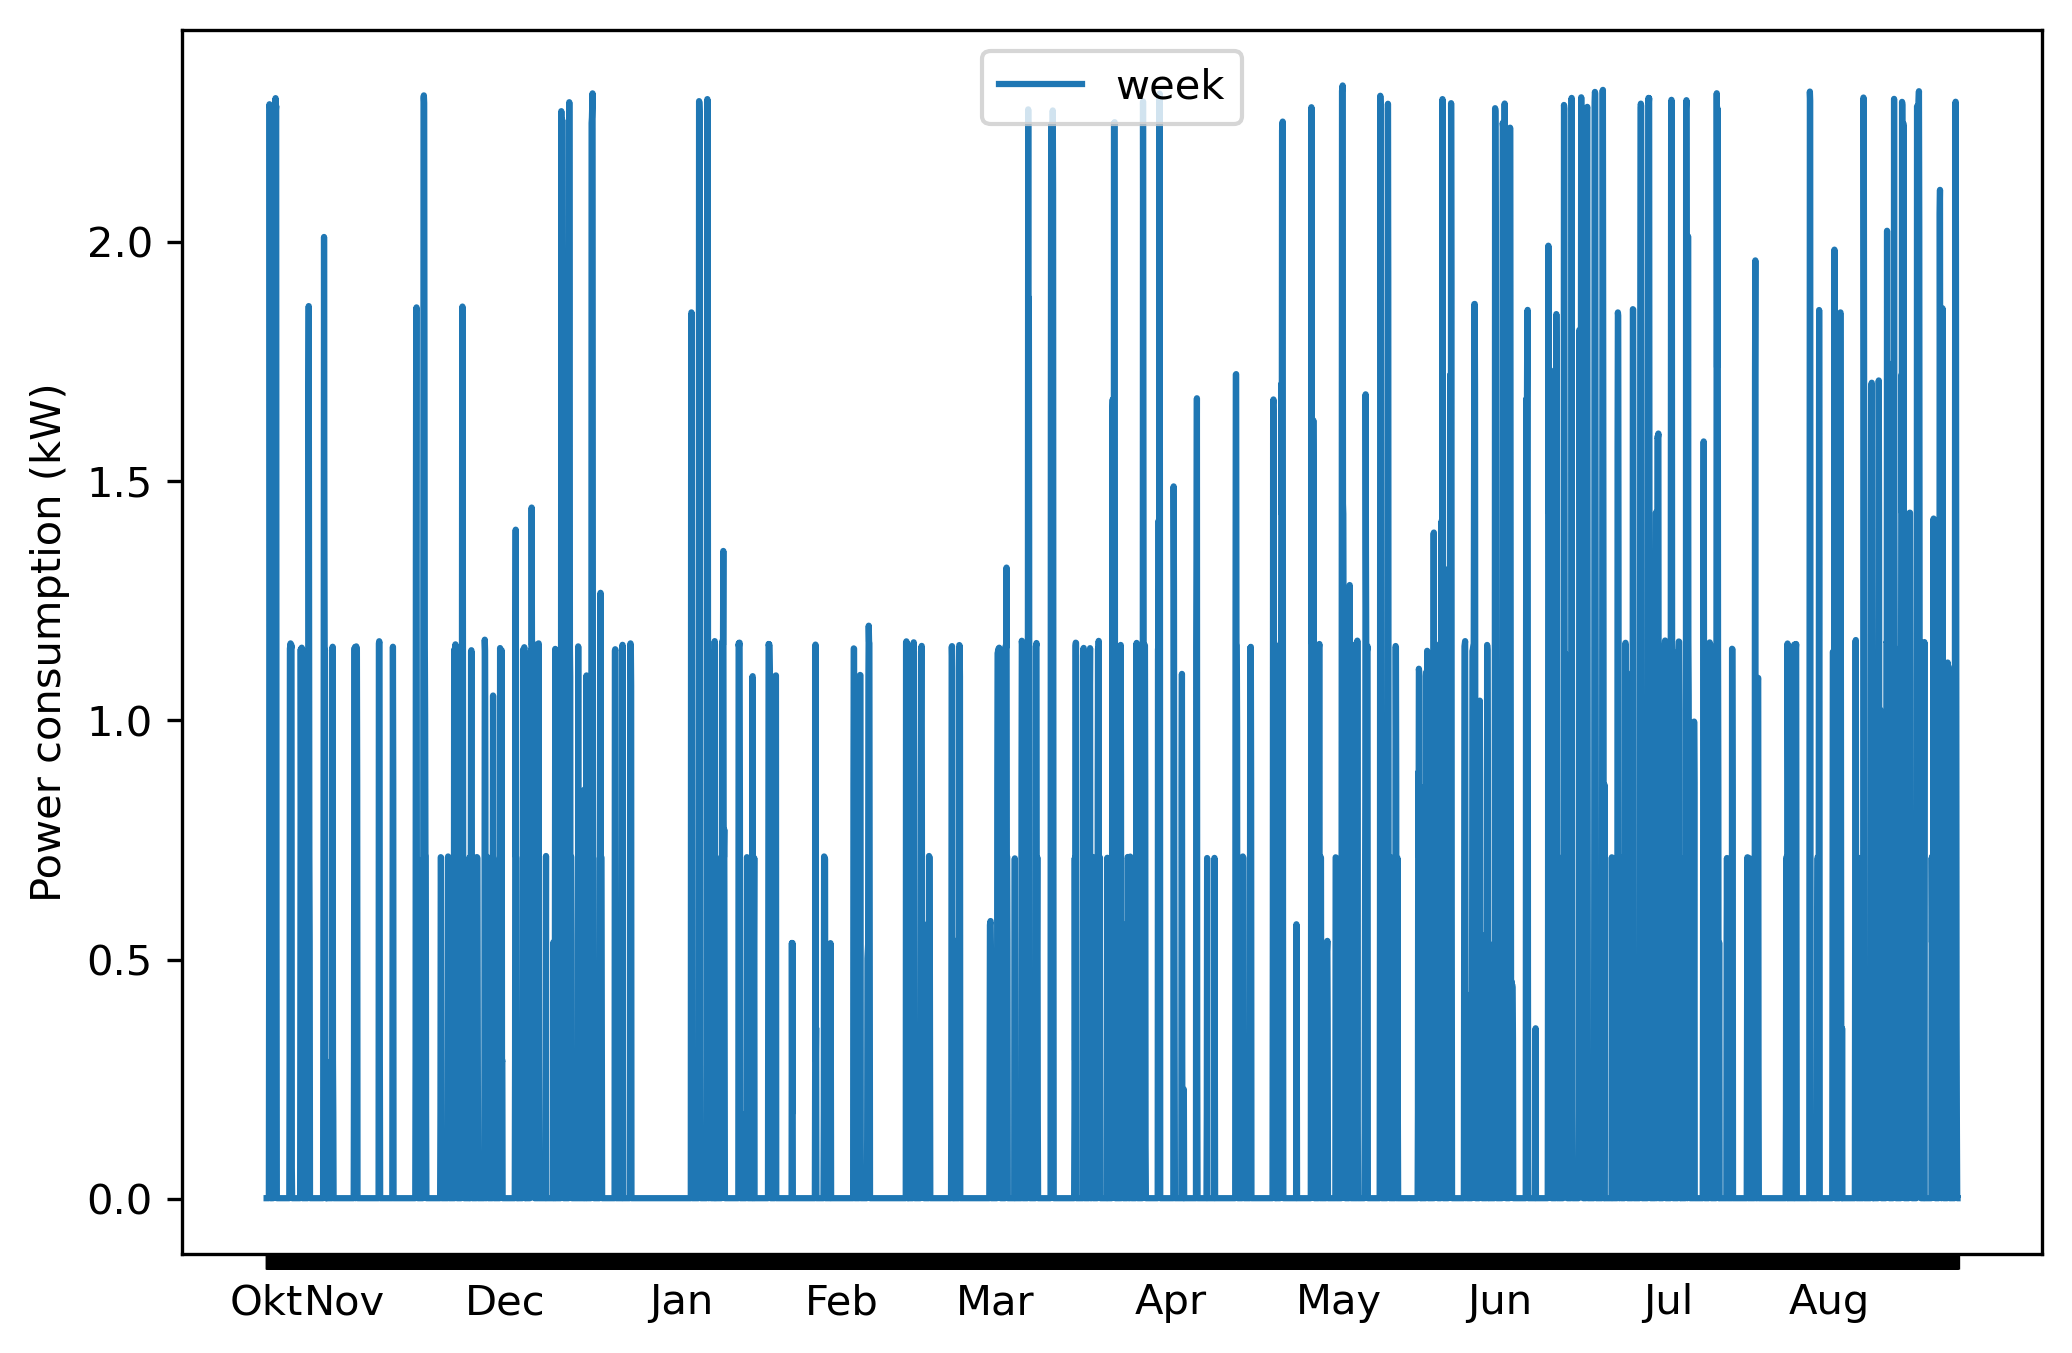

In [10]:
# plot average charging power consumption per hour during the week


import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import figure

x_labels=[]

current_month=-1

months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Okt","Nov","Dec",]

for date_hour in list_of_dates:
    date=date_hour[0]
    if date.month != current_month:
        current_month=date.month
        x_labels.append(months[date.month-1])
    else:
        x_labels.append("")
        
        
fig = plt.figure(figsize=(8, 6), dpi=300)
spacing = 0.2
fig.subplots_adjust(bottom=spacing)


plt.plot(range(len(list_of_dates)), list_of_powers_charging,label = "week")
plt.xticks((range(len(list_of_dates))), x_labels)
plt.ylabel('Power consumption (kW)')
plt.legend()
plt.savefig(os.path.join('average power consumption charging poles per hour week.png'), dpi=300, format='png')

In [11]:
# print contribution charging to total

total_charging=0
total_all=0

for power in list_of_powers:
    total_all+=power
    
for power in list_of_powers_charging:
    total_charging+=power 

print(total_charging)
print(total_all)
print(total_charging/total_all)

1081.294449999932
27972.88723333332
0.03865508915759792


In [12]:
# print contribution charging to total during office hours


import numpy

print(total_all/(len(list_of_powers)))
print(total_charging/(len(list_of_powers_charging)))

list_charging_power_atl1=[]
list_total_power_atl1=[]

print(len(list_of_powers_charging))
print(len(list_of_powers))


for i in range(len(list_of_powers_charging)):
    power_charging=list_of_powers_charging[i]
    power_total=list_of_powers[i]
    if power_charging>0.2:
        list_charging_power_atl1.append(power_charging)
        list_total_power_atl1.append(power_total)
        
avg_total=numpy.sum(list_total_power_atl1)/len(list_total_power_atl1)
avg_charging=numpy.sum(list_charging_power_atl1)/len(list_charging_power_atl1)

print(avg_total)
print(avg_charging)
print(avg_charging/avg_total)



5.274917449242564
0.20390240429944034
5303
5303
17.188831412151067
1.0526469950738917
0.061240172169572754


In [13]:
# reformat data to lists for plotting

import math 
intersection = power_date_dict.keys()

powr=[]
charg=[]
intersection_dates=[]

for key in intersection:
    powr_i=power_date_dict[key][0]
    if not math.isnan(powr_i):
        powr.append(power_date_dict[key][0])
        charg.append(power_date_dict_charging[key][0])
        intersection_dates.append(key)

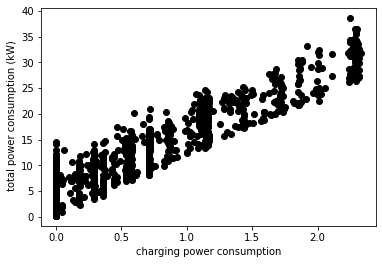

In [14]:
# scatterplot
# NOTE: suspicious data

plt.plot(charg, powr, 'o', color='black');
plt.xlabel('charging power consumption')
plt.ylabel(' total power consumption (kW)')
plt.savefig(os.path.join('scatterplot charging total.png'), dpi=300, format='png')

In [15]:
# linear curve fit

from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

def objective(x, a, c):
    return a*x+c
popt, _ = curve_fit(objective, charg, powr)
a,c = popt

print('y = %.5f * x + %.5f' % (a, c))

y = 13.25325 * x + 2.57255


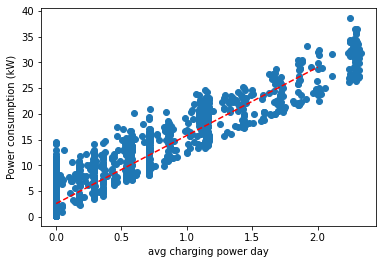

In [18]:
# data + linear curve fit


pyplot.scatter(charg, powr)
x_line = arange(min(charg), max(charg), 1)
y_line = objective(x_line, a, c)
pyplot.plot(x_line, y_line, '--', color='red')
plt.xlabel('avg charging power day')
plt.ylabel('Power consumption (kW)')

pyplot.savefig(os.path.join('scatterplot with charg total regression.png'), dpi=300, format='png')
pyplot.show()